# 6.5 Machine Learning Part 2- Unsupervised ML: Clustering

## Contents:

#### 01. Importing libraries and data and renaming columns
#### 02. The elbow technique
#### 03. k-means clustering

## 01. Importing libraries and data and renaming columns

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn. decomposition import PCA

In [9]:
# ensure the graphs created are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# Create path
path=r'/Users/aylaarreguin/10-04-2022 AllTrails National Park Trail Analysis/'

In [11]:
# Import the cleaned AllTrail dataset 
df = pd.read_csv(os.path.join(path, 'Data/Prepared Data/AllTrails_cleaned.csv'), index_col=[0])

In [12]:
df.shape

(3313, 20)

In [13]:
df.head()

,trail_id,name,area_name,city_name,state_name,country_name,popularity,difficulty_rating,route_type,avg_rating,num_reviews,features,activities,length_miles,elevation_gain_feet,latitude,longitude,difficulty,features_count,activities_count
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,24.8931,5,out and back,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",9.699973,3812.000122,60.18852,-149.63156,hard,7,5
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,18.0311,3,out and back,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",4.299988,1666.000053,63.73049,-148.91968,moderate,5,5
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,17.7821,1,out and back,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",1.799995,269.000009,60.18879,-149.63100,easy,4,2
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,16.2674,1,loop,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",2.099994,393.000013,63.73661,-148.91500,easy,7,5
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,12.5935,5,out and back,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",18.499948,3690.000118,63.73319,-148.89682,hard,5,5


In [14]:
# Create new dataframe with all categorical columns dropped 
df1 = df.drop(columns =['trail_id','name','area_name','city_name','state_name','country_name','route_type','features','activities','difficulty'])

In [15]:
# Check df1 
df1.head()

,popularity,difficulty_rating,avg_rating,num_reviews,length_miles,elevation_gain_feet,latitude,longitude,features_count,activities_count
0,24.8931,5,5.0,423,9.699973,3812.000122,60.18852,-149.63156,7,5
1,18.0311,3,4.5,260,4.299988,1666.000053,63.73049,-148.91968,5,5
2,17.7821,1,4.5,224,1.799995,269.000009,60.18879,-149.63100,4,2
3,16.2674,1,4.5,237,2.099994,393.000013,63.73661,-148.91500,7,5
4,12.5935,5,4.5,110,18.499948,3690.000118,63.73319,-148.89682,5,5


## 02. Elbow Technique 

In [16]:
# Starting by defining the range of the cluster
num_cl = range(1, 20) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [17]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-29087840045.61372,
 -13258980635.046064,
 -7281450266.089441,
 -4374994927.288819,
 -2980796764.8518143,
 -1951380860.3825285,
 -1466902963.8704996,
 -1092426869.150154,
 -881687966.3802581,
 -695367917.0538236,
 -598960640.0165026,
 -529027212.43373466,
 -477129292.49458605,
 -422921062.3705665,
 -377363518.8257557,
 -341840042.7996083,
 -301616365.61599433,
 -269787517.24790716,
 -244873819.34633714]

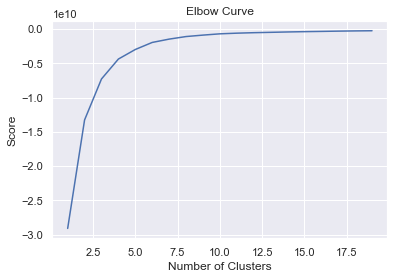

In [18]:
# And finally, create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

After reviewing the elbow curve above, I will use 4 clusters because that looks to be where the curve has started to level out.

## 03. k-means Clustering

In [19]:
# First, create the k-means object based on the # of clusters
kmeans = KMeans(n_clusters = 4) 

In [20]:
# Then fit the K-mean into the DF
kmeans.fit(df1)

KMeans(n_clusters=4)

In [21]:
# attaching to the dataframe
df1['clusters'] = kmeans.fit_predict(df1)

In [22]:
df1.head()

,popularity,difficulty_rating,avg_rating,num_reviews,length_miles,elevation_gain_feet,latitude,longitude,features_count,activities_count,clusters
0,24.8931,5,5.0,423,9.699973,3812.000122,60.18852,-149.63156,7,5,1
1,18.0311,3,4.5,260,4.299988,1666.000053,63.73049,-148.91968,5,5,0
2,17.7821,1,4.5,224,1.799995,269.000009,60.18879,-149.63100,4,2,0
3,16.2674,1,4.5,237,2.099994,393.000013,63.73661,-148.91500,7,5,0
4,12.5935,5,4.5,110,18.499948,3690.000118,63.73319,-148.89682,5,5,1


In [23]:
# Check value count of clusters 
df1['clusters'].value_counts()

0    2368
1     787
3     147
2      11
Name: clusters, dtype: int64

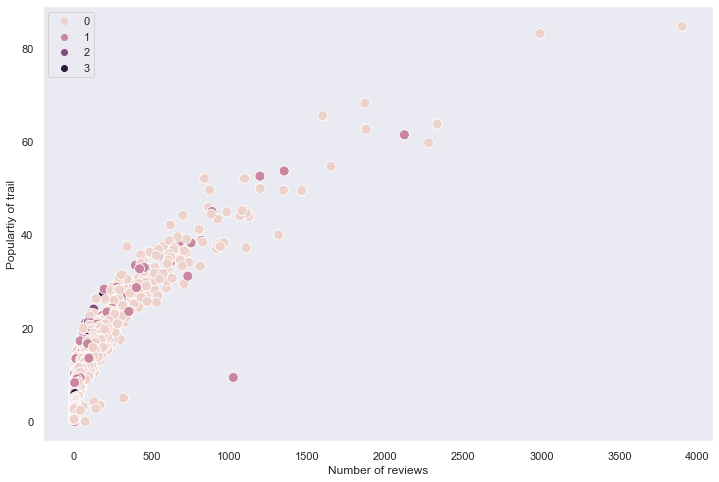

In [24]:
# And now plot it! First Number of Reviews and Popularity of Trail

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['num_reviews'], y=df1['popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of reviews') # Label x-axis.
plt.ylabel('Populartiy of trail') # Label y-axis.
plt.show()

- We can see that the groups are all scrambled and mixed without a clear seperation to them. In general the popularity of the trail arcs upward as the number of reviews increase. 

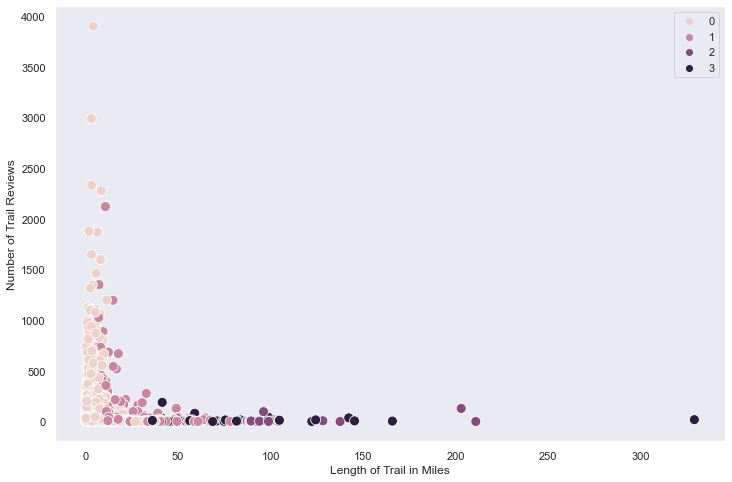

In [25]:
# Plot length_miles and num_reviews 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['length_miles'], y=df1['num_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of Trail in Miles') # Label x-axis.
plt.ylabel('Number of Trail Reviews') # Label y-axis.
plt.show()

- We can see that the groups are a little more clearly seperated in this graph. Group 0 is grouped mostly where the length of the trails are below 10 miles and also it appears that this group typically has the highest number of reviews. This would make sense because trails that are less than 10 miles are probably the most visited by all different types of hikers including elderly, families, children, ect. 
- 1's are somewhat grouped together from 10 miles to 50ish miles, however there is more mixing of 2's and 3's from 40 miles on. However, 2's and 3's don't ever rise above 250 reviews. This would make sense as there are probably far far fewer individuals that have completed trails 40 miles or longer, resulting in far fewer people to review those trails. 

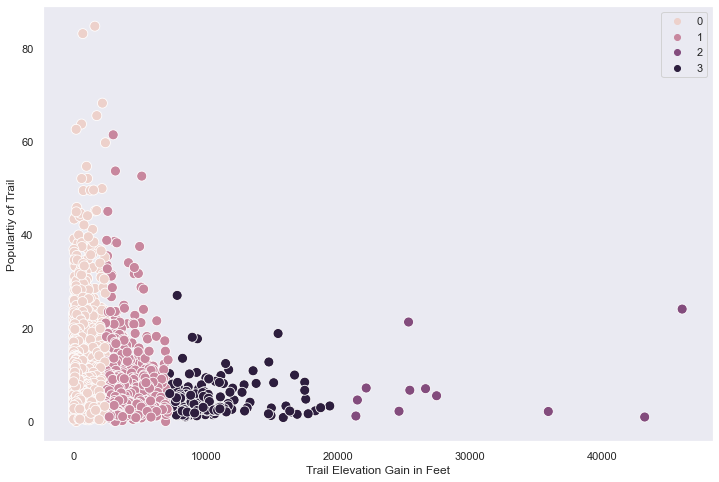

In [26]:
# Plot elevation_gain_feet and popularity 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['elevation_gain_feet'], y=df1['popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trail Elevation Gain in Feet') # Label x-axis.
plt.ylabel('Populartiy of Trail') # Label y-axis.
plt.show()

- This is the best grouping we have seen so far. 0's are grouped only on trails that are less than 300 feet of elevation gain and they are also the most popular trails. Like the distance groupings we saw on the last graph, this also makes logical sense because trails with higher elevation are harder and consequently less approachable for hikers of varying skill levels. 
- 1's are the next grouping between 300-800 feet of elevation gain and the second most popular grouping. This follows the logic of trails with less elevation being more popular. This grouping seems to represent the second easiest trails, and the second most popular. 
- 3's are grouped between 800-2000 ft of elevation gain and under 30 in popularity.
- 2's are grouped between 2100-4500 ft of elevation gain and under 25 in popularity. 

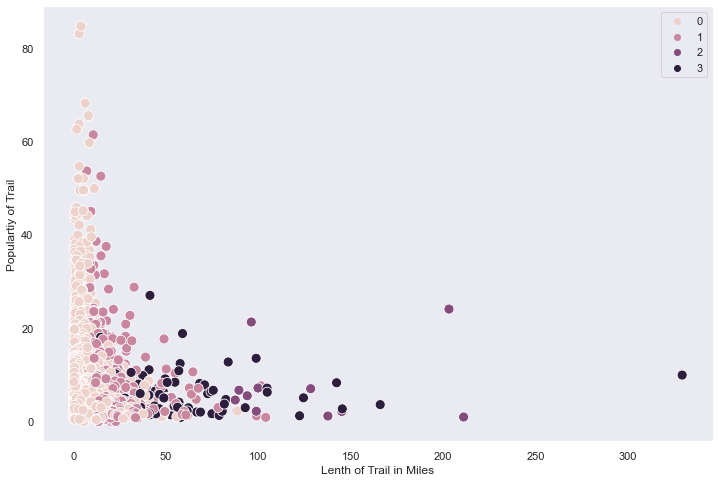

In [27]:
# Plot lenth_miles and popularity 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['length_miles'], y=df1['popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Lenth of Trail in Miles') # Label x-axis.
plt.ylabel('Populartiy of Trail') # Label y-axis.
plt.show()

- Here we have a similar clustering as the previous graph, with slightly less definition. 0's are again the most popular and are grouped mostly between miles 0-25.

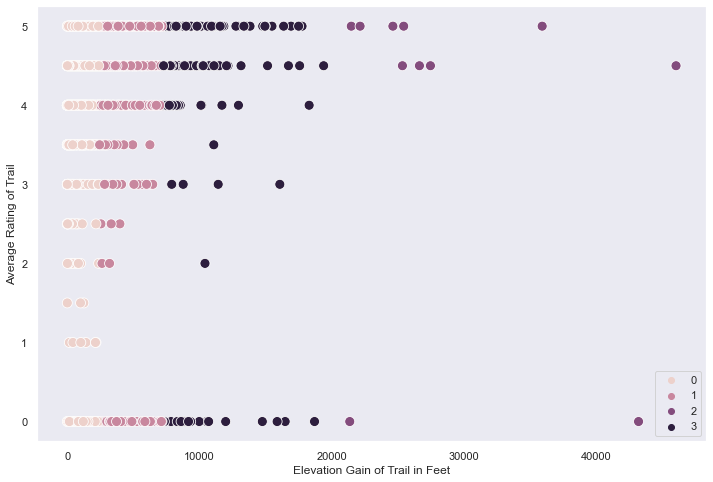

In [28]:
# Plot elevation_gain_feet and avg_rating of Trail 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['elevation_gain_feet'], y=df1['avg_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Elevation Gain of Trail in Feet') # Label x-axis.
plt.ylabel('Average Rating of Trail') # Label y-axis.
plt.show()

- We do have groupings in this graph, however they look a little odd because of the way the average rating of trails is already grouped from 0-5.
- The groups follow the same logic as the previous graph when it comes to elevation gain of the trails in feet. However, the elvation gain does not seem to clearly effect the grouping's average rating of the trails. There are 0-3's in almost every rating except for rating 1 which consists of only 0's. 

In [29]:
# Grouping 
df1.loc[df1['clusters'] == 0, 'cluster'] = 'light pink'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'dark pink'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'light purple'
df1.loc[df1['clusters'] == 3, 'cluster'] = 'dark purple'

In [30]:
df1.groupby('cluster').agg({'popularity':['mean', 'median'], 
                         'avg_rating':['mean', 'median'], 
                         'num_reviews':['mean', 'median'],
                          'length_miles':['mean', 'median'],
                           'elevation_gain_feet':['mean', 'median'],
                           'avg_rating':['mean', 'median']})

popularity         avg_rating        num_reviews         \
                   mean  median       mean median        mean median   
cluster                                                                
dark pink      7.630059  5.8703   4.271919    4.5   43.526048    9.0   
dark purple    5.014280  3.6559   3.884354    4.5    8.530612    3.0   
light pink     9.644372  7.0469   4.159417    4.5   83.311233   24.0   
light purple   7.538209  5.5206   3.909091    4.5   23.000000    4.0   

             length_miles            elevation_gain_feet                
                     mean     median                mean        median  
cluster                                                                 
dark pink       18.296772  15.399957         4010.142441   3710.000119  
dark purple     47.934560  36.399898        10370.748631   9419.000301  
light pink       5.723210   4.299988          834.456108    682.000022  
light purple   126.463283  99.799721        29053.273657  25436.000814

This information displays additional insights. We can see that the light pink grouping contains the most popular trails which are also the trails with the most reviews. These trails are the shortest trails and the trails with the least elevation gain. All of this information confirms previous hypothesis and can be used to predict which trails will be the most popular throughout national parks and elsewhere. 